In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


## Good Feature to Track

In [2]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

def feature_corners(img_url):
  img = cv2.imread(img_url)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = np.float32(gray)
  
  corners = cv2.goodFeaturesToTrack(gray, 40, 0.01, 10) #the number 40 here controls how many corners to show
  corners = np.int0(corners)
  return corners

def feature_corners_draw(corner, img_url):
  img = cv2.imread(img_url)
  for corner in corner:
    x, y = corner.ravel()
    cv2.circle(img, (x,y), 3, 255, -1)
  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()


## Gaussian Filter

In [3]:
from PIL import Image, ImageFilter
def Gaussian(img_url):
  # Opening the image 
  # (R prefixed to string in order to deal with '\' in paths)
  image = Image.open(img_url)
  # Blurring image by sending the ImageFilter.
  # GaussianBlur predefined kernel argument
  image = image.filter(ImageFilter.GaussianBlur)  
  image = np.float32(image)
  corners = cv2.goodFeaturesToTrack(image, 30, 0.01, 10) #the number 40 here controls how many corners to show
  corners = np.int0(corners)
  return corners

def Plot_Gaussian(Corner, img_url):
  image = Image.open(img_url)
  image = np.float32(image)
  for corner in Corner:
    x, y = corner.ravel()
    cv2.circle(image, (x,y), 3, 255, -1)
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

# img_list = [i for i in range(5)]
# for i in img_list:
#   Plot_Gaussian(Gaussian('/content/drive/MyDrive/ant/ant'+ str(i) + '.png'), '/content/drive/MyDrive/ant/ant'+ str(i) + '.png')


## Blob Detection

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def blob_detection(img_url):  
  img = cv2.imread(img_url)
  # img = Image.open(img_url)
  gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # image = img.filter(ImageFilter.GaussianBlur)  
  # image = np.float32(image)
  # apply Gaussian Blur
  smoothed = cv2.GaussianBlur(gray, (0,0), sigmaX=9, sigmaY=9, borderType = cv2.BORDER_DEFAULT)
  # # do adaptive threshold on gray image
  # thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 65, 10)
  # create the small border around the image, just bottom
  #img=cv2.copyMakeBorder(img, top=0, bottom=1, left=0, right=0, borderType= cv2.BORDER_CONSTANT, value=[255,255,255] ) 
  # create the params and deactivate the 3 filters
  params = cv2.SimpleBlobDetector_Params() #https://docs.opencv.org/3.4/d0/d7a/classcv_1_1SimpleBlobDetector.html
  params.filterByArea = False
  params.filterByConvexity = False
  params.filterByInertia = False
  params.filterByConvexity = False
  # detect the blobs
  detector = cv2.SimpleBlobDetector_create(params)
  keypoints = detector.detect(gray)
  return keypoints
  # return cv2.KeyPoint.convert(keypoints)

def plot_blob_detection(blob_detection, img_url):
  # display them
  img = cv2.imread(img_url)
  keypoints = blob_detection
  gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 65, 10)
  img_with_keypoints = cv2.drawKeypoints(img, keypoints, outImage=np.array([]), color=(0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #https://shimat.github.io/opencvsharp_docs/html/8fb4fd5d-86b1-0be4-8efe-3a6d2b51294c.htm
  thresh_with_keypoints = cv2.drawKeypoints(thresh, keypoints, outImage=np.array([]), color=(0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  cv2_imshow(img_with_keypoints)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

## final step

In [5]:
def method2(noise_remove_method, img_url):

  ## when dealing with unparalleled ants, use noise_remove_method for key1, otherwise use good featureto track(without using gaussian filter)
  #key1 = noise_remove_method(img_url)
  key1 = feature_corners(img_url)

  key2 = cv2.KeyPoint.convert(blob_detection(img_url))
  list2 = []
  for i in range(len(key1)):
    for j in range(len(key2)):
      # Find the points in key1 list that are similar to the points in key2 list
      if np.linalg.norm(key1[i]-key2[j]) < 27:
        list2.append(key1[i])
  
  k = np.array(list2).tolist()
  k = np.unique(k, axis = 0)
  k = k.tolist()
  
  remove_list = []
  key1 = np.array(key1).tolist()
  for i in range(len(key1)):
    for j in range(len(k)-1):
      if key1[i][0] == k[j][0]:
        remove_list.append(i)
  for m in range(len(remove_list)):
      remove_list[m] = remove_list[m] - m*1
  for i in remove_list:
    del key1[i]
  
  return np.array(key1)


def Plot_Gaussian(Corner, img_url):
  image = Image.open(img_url)
  image = np.float32(image)
  for corner in Corner:
    x, y = corner.ravel()
    cv2.circle(image, (x,y), 3, 255, -1)
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()


# Collect all the prints from 50 frames from unparallel ants data

In [7]:
single_res = []
for j in range(50): #all the datapoints for 20 frames of the ants images
  single_image = method2(Gaussian, '/content/drive/MyDrive/test_ant/ant' + str(j) + '.png')
  for i in range(len(single_image)):
    single_res.append((single_image[i][0][0], single_image[i][0][1]))
single_x = [single_res[i][0] for i in range(len(single_res))]
single_y = [single_res[i][1] for i in range(len(single_res))]

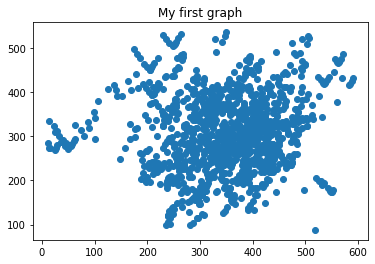

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
  
# x axis values
x = single_x
  
# y axis values
y = single_y
  
# plotting strip plot with seaborn
ax = plt.scatter(x, y);
  
# # giving labels to x-axis and y-axis
# ax.set(xlabel ='x(px)', ylabel ='y(px)')
  
# giving title to the plot
plt.title('My first graph');
  
# function to show plot
plt.show()

# Collect all the prints from 100 frames from parallel ants data

In [9]:
single_res2 = []
# notice here that j start from 1 not 0!!!
for j in range(1, 100): #all the datapoints for 100 frames of the ants images
  single_image = method2(Gaussian, '/content/drive/MyDrive/parallel/image' + str(j) + '.jpg')
  for i in range(len(single_image)):
    single_res2.append((single_image[i][0][0], single_image[i][0][1]))
single_x_parallel = [single_res2[i][0] for i in range(len(single_res2))]
single_y_parallel = [single_res2[i][1] for i in range(len(single_res2))]

In [58]:
np.mean(single_res2,axis=0)

array([348.89986589, 277.13723737])

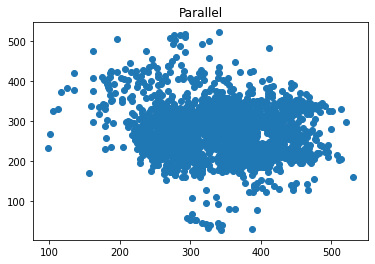

In [11]:
  
# x axis values
x = single_x_parallel
  
# y axis values
y = single_y_parallel
  
# plotting strip plot with seaborn
ax = plt.scatter(x, y);
  
# # giving labels to x-axis and y-axis
# ax.set(xlabel ='x(px)', ylabel ='y(px)')
  
# giving title to the plot
plt.title('Parallel');
  
# function to show plot
plt.show()

# K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_clusters=9,n_init=10,max_iter=300,random_state=42)

In [13]:
kmeans.fit(single_res2)

KMeans(init='random', n_clusters=9, n_init=10, random_state=42)

## The centroids of the 9 clusters

In [14]:
kmeans.cluster_centers_

array([[234.27678571, 410.46428571],
       [367.58536585,  96.75609756],
       [439.0459364 , 233.28268551],
       [345.67096774, 335.95483871],
       [263.60058309, 289.97376093],
       [372.36213992, 209.93415638],
       [281.55513308, 218.05323194],
       [428.86666667, 323.05263158],
       [365.81512605, 279.99719888]])

In [15]:
len(single_res2)

2237

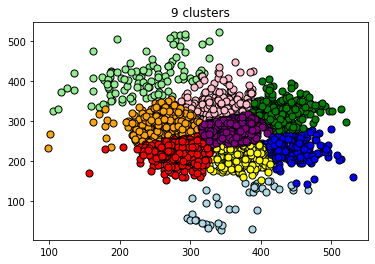

In [16]:
a = list(kmeans.labels_)
colors = ['lightgreen', 'lightblue','blue','pink','orange','yellow','red','green','purple']
for k in range(0,9):
  res_a = []
  for i in range(len(a)):
    if a[i] == k:
      res_a.append(i)
  cluster1 = [single_res2[i] for i in res_a]
  cluster1_x = [cluster1[j][0] for j in range(len(cluster1))]
  cluster1_y = [cluster1[j][1] for j in range(len(cluster1))]
  plt.scatter(
      cluster1_x, cluster1_y,
      s=50, c=colors[k],
      marker='o', edgecolor='black',
      label='cluster 2'
  )
  plt.title('9 clusters')

# plot when cluster number is 8

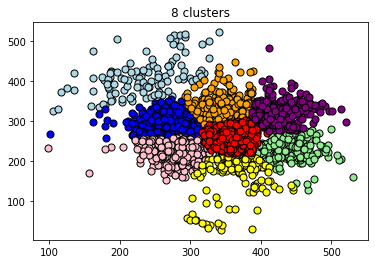

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_clusters=8,n_init=10,max_iter=300,random_state=42)
kmeans.fit(single_res2)
a = list(kmeans.labels_)
colors = ['lightgreen', 'lightblue','blue','pink','orange','yellow','red','purple']
for k in range(0,8):
  res_a = []
  for i in range(len(a)):
    if a[i] == k:
      res_a.append(i)
  cluster1 = [single_res2[i] for i in res_a]
  cluster1_x = [cluster1[j][0] for j in range(len(cluster1))]
  cluster1_y = [cluster1[j][1] for j in range(len(cluster1))]
  plt.scatter(
      cluster1_x, cluster1_y,
      s=50, c=colors[k],
      marker='o', edgecolor='black',
      label='cluster 2'
  )
  plt.title("8 clusters")

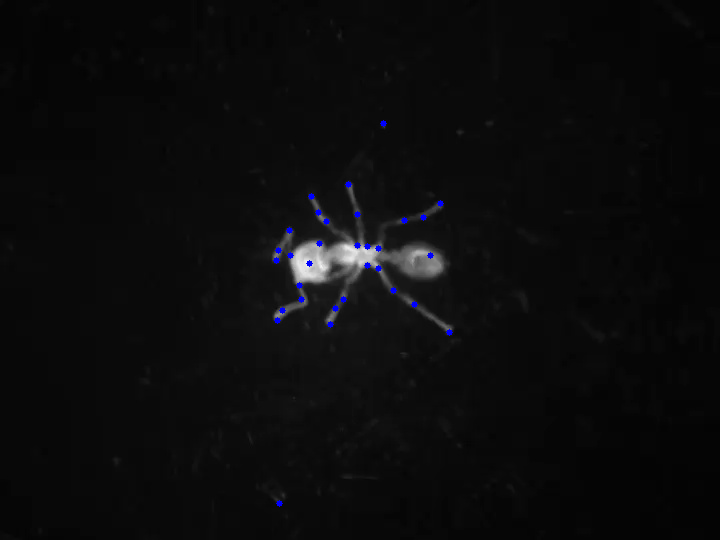

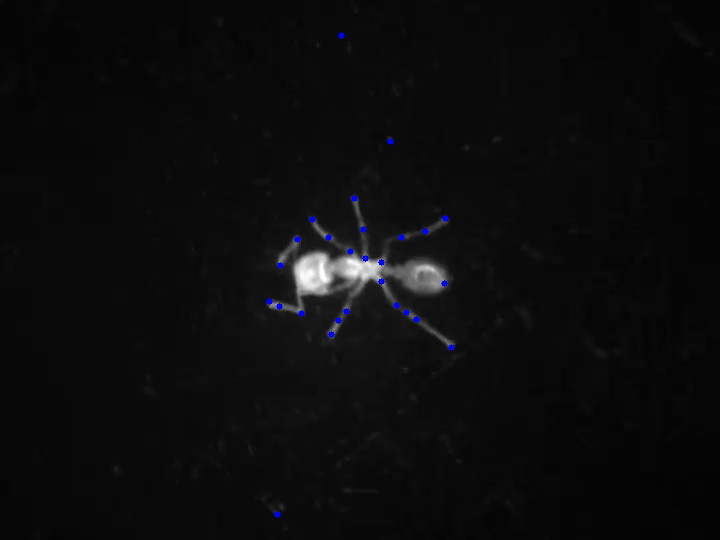

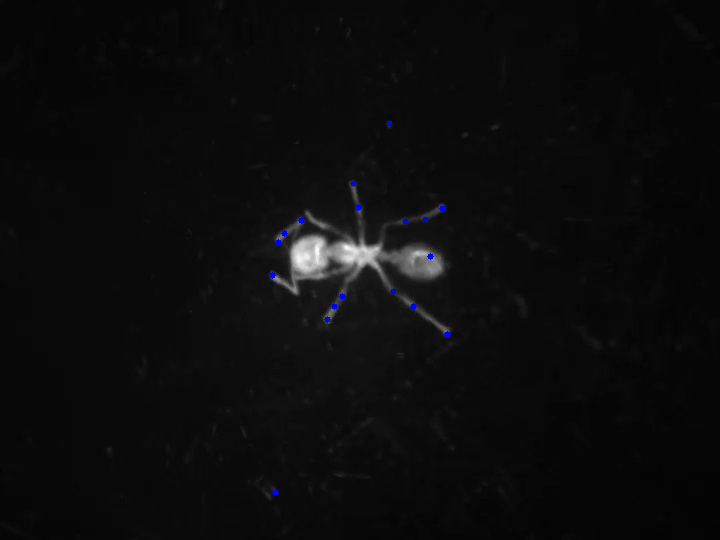

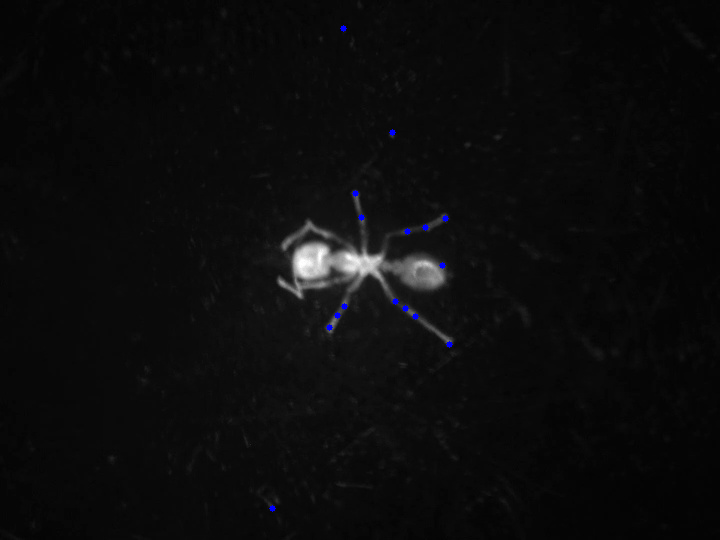

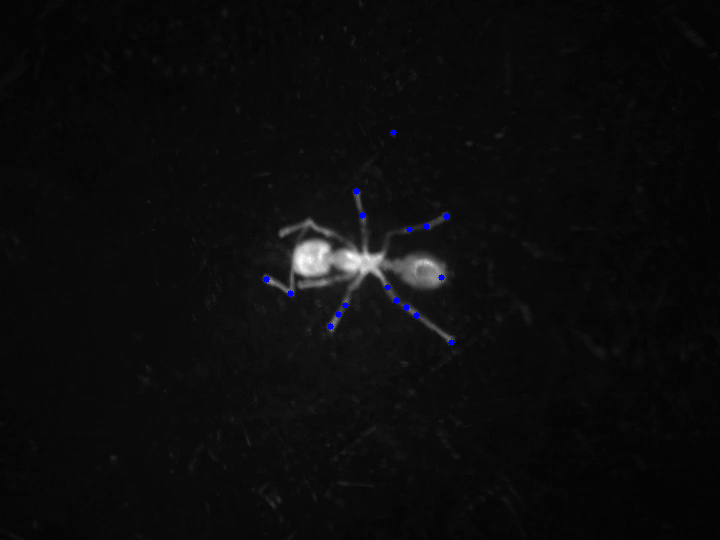

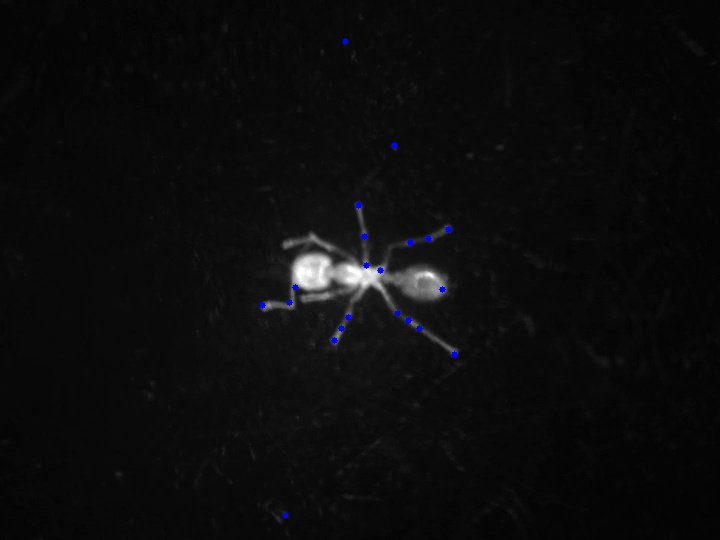

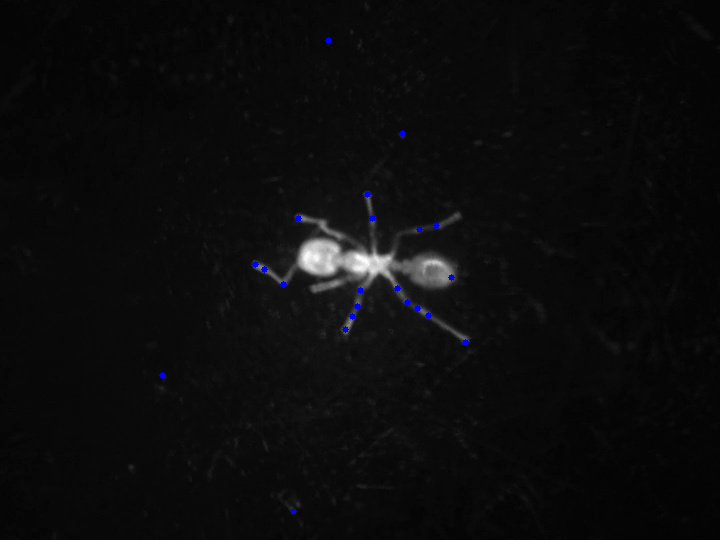

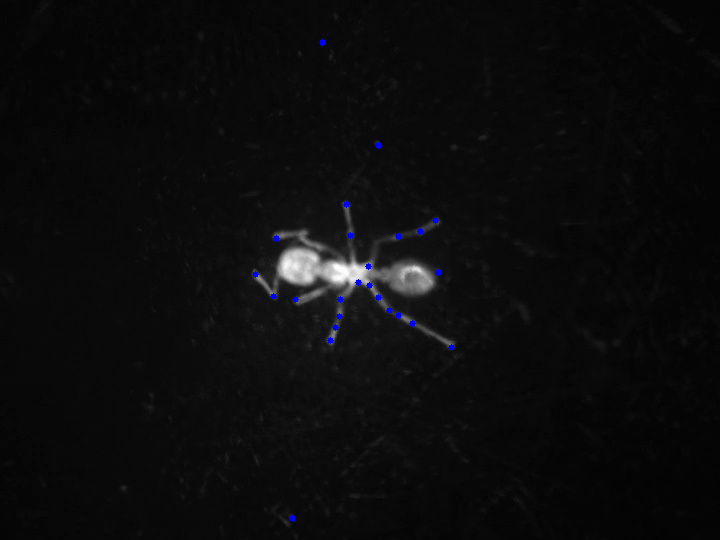

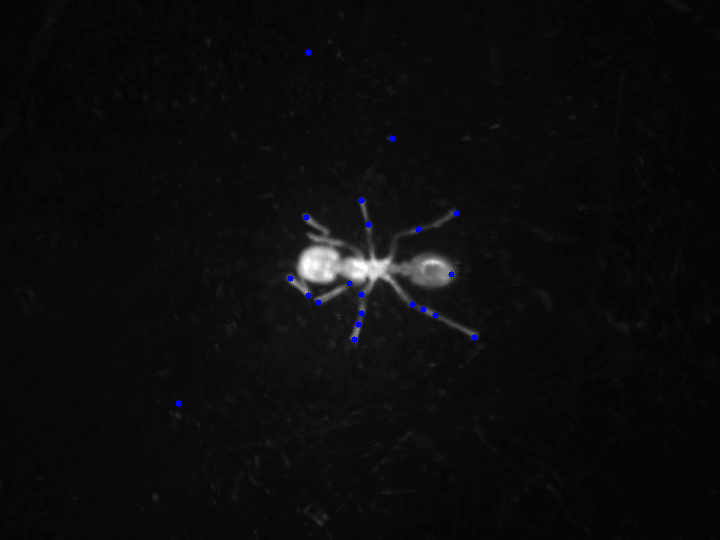

In [18]:
img_list = [i for i in range(1,10)]
for j in img_list:
  Plot_Gaussian(method2(Gaussian, '/content/drive/MyDrive/parallel/image' + str(j) + '.jpg'), '/content/drive/MyDrive/parallel/image' + str(j) + '.jpg')

## Leg Angle Calculation


In [41]:
# import math
# def slope(p1,p2):    
#    return (p2[1]-p1[1])/(p2[0]-p1[0])

# def leg_angle1(img_url, num_points):
#   img = cv2.imread(img_url)
#   blobs = cv2.KeyPoint.convert(blob_detection(img_url))
#   a = np.average(blobs, axis = 0)
#   mean_point = [int(a[0]), int(a[1])]
#   for i in range(num_points):
#     point_a = method2(Gaussian, img_url)[i][0]

#     img = cv2.imread(img_url)
#     cv2.circle(img, point_a, 3, 255, -1)
#     cv2.circle(img, mean_point, 3, 255, -1)
#     cv2_imshow(img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     m1 = slope(mean_point, point_a)
#     m2 = 0
#     angle = math.atan((m2-m1)/(1+m1*m2))   
#     angle = round(math.degrees(angle)) 

#     # if point_a[1] > mean_point[1]:
#     #   angle = angle
#     # else:
#     #   angle = -angle
    
#     # if point_a[0] > mean_point[0]:
#     #   angle += 180
#     print(angle)
#     print(mean_point)
#     print(point_a)
# leg_angle1('/content/drive/MyDrive/parallel/image' + str(1) + '.jpg', 10)

In [21]:
clusters = [(int(kmeans.cluster_centers_[i][0]), int(kmeans.cluster_centers_[i][1])) for i in range(len(kmeans.cluster_centers_))]
clusters

[(434, 230),
 (235, 410),
 (267, 294),
 (274, 222),
 (348, 330),
 (365, 173),
 (366, 264),
 (427, 320)]

In [22]:
mean_point = (int(np.mean(single_res2, axis = 0)[0]), int(np.mean(single_res2, axis = 0)[1]))
mean_point

(348, 277)

In [23]:
# centroids_angle = []
# for i in range(len(clusters)):
#   m1 = slope(mean_point, kmeans.cluster_centers_[i])
#   m2 = 0
#   angle = math.atan((m2-m1)/(1+m1*m2))   
#   angle = round(math.degrees(angle)) 
#   centroids_angle.append(angle)
# centroids_angle

[28, 50, 12, -37, -89, 81, 35, -29]

In [43]:
# image = cv2.imread('/content/drive/MyDrive/parallel/image' + str(10) + '.jpg')
# colors = [(0, 255, 0), (255, 255, 0),(255, 0, 0), (255, 255, 255), (255, 0, 255),(0, 0, 255), (255, 128, 0), (255, 153, 255)]
# thickness = 4
# for i in range(len(clusters)):
#   cv2.arrowedLine(image, mean_point, clusters[i], colors[i], thickness) 
#   cv2.putText(image, text = str(centroids_angle[i]), org = clusters[i], fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color= colors[i],
#             thickness=2, lineType=cv2.LINE_AA)
# cv2_imshow(image) 

In [30]:
import math

def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]

def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360
    
    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 
        
        return ang_deg

In [32]:
lineA = ((379, 264),(378,248)) 

lineB = ((379, 264),(350, 264))
ang(lineA, lineB)

86.42366562500266

In [55]:
len(method2(Gaussian, '/content/drive/MyDrive/parallel/image' + str(1) + '.jpg'))

32

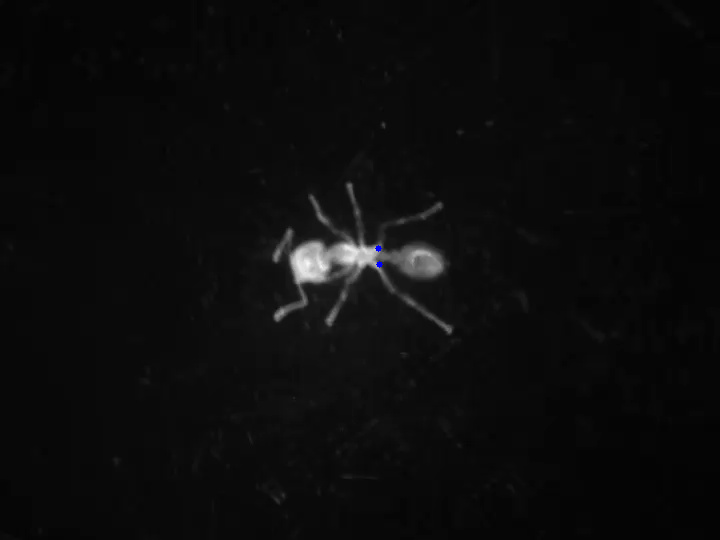

93.57633437499736
[379, 264]
[378 248]


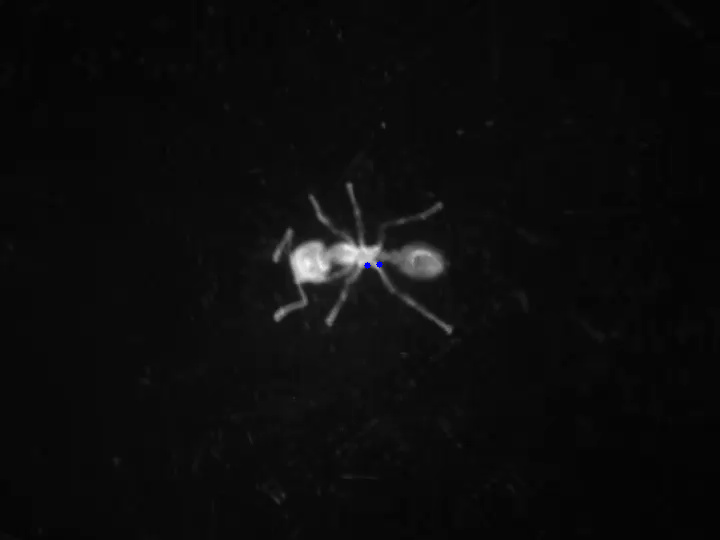

-175.23635830927378
[379, 264]
[367 265]


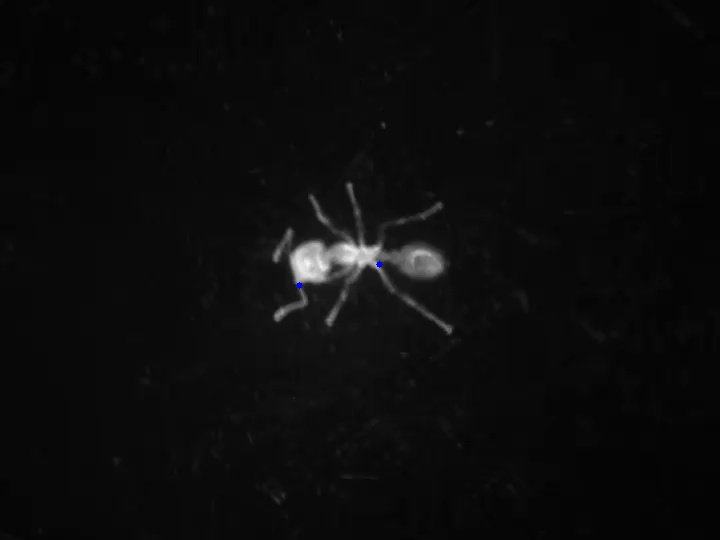

-165.29169610031724
[379, 264]
[299 285]


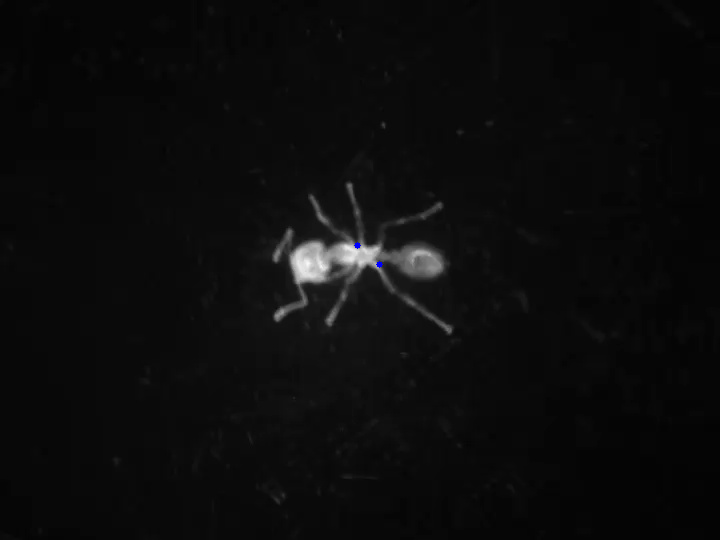

139.1849161251184
[379, 264]
[357 245]


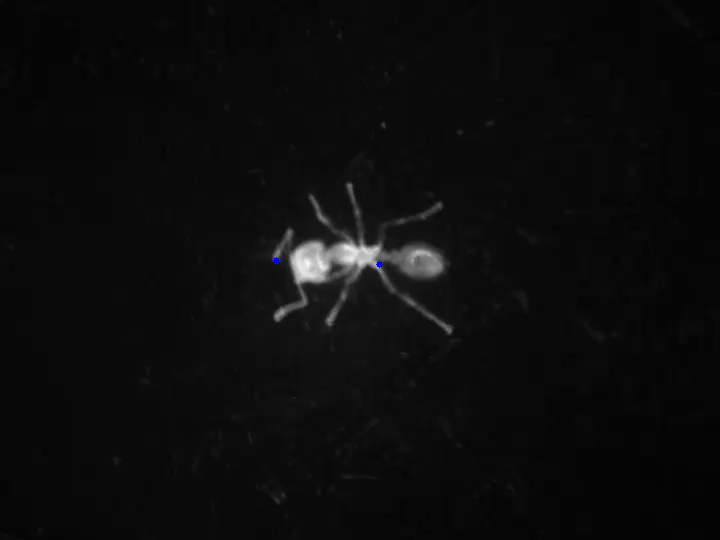

177.77603875961452
[379, 264]
[276 260]


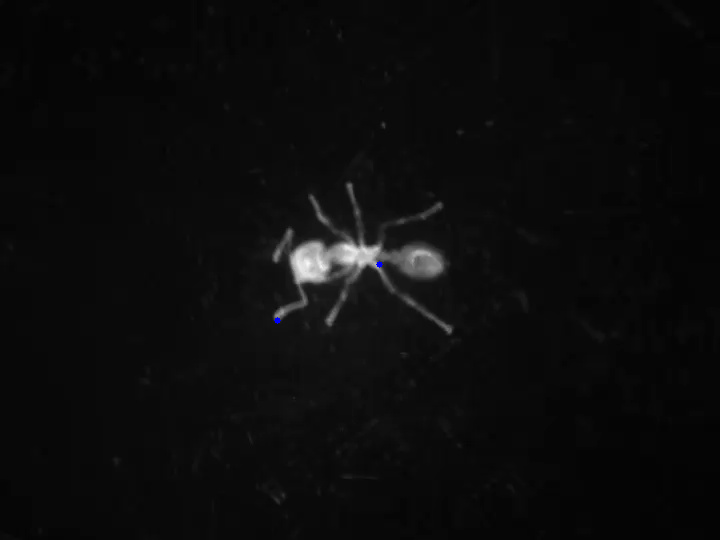

-151.2323506611562
[379, 264]
[277 320]


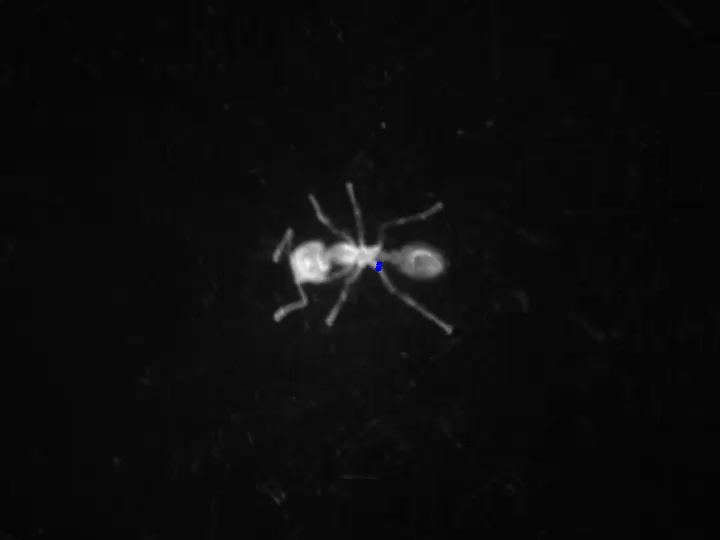

-104.03624346792648
[379, 264]
[378 268]


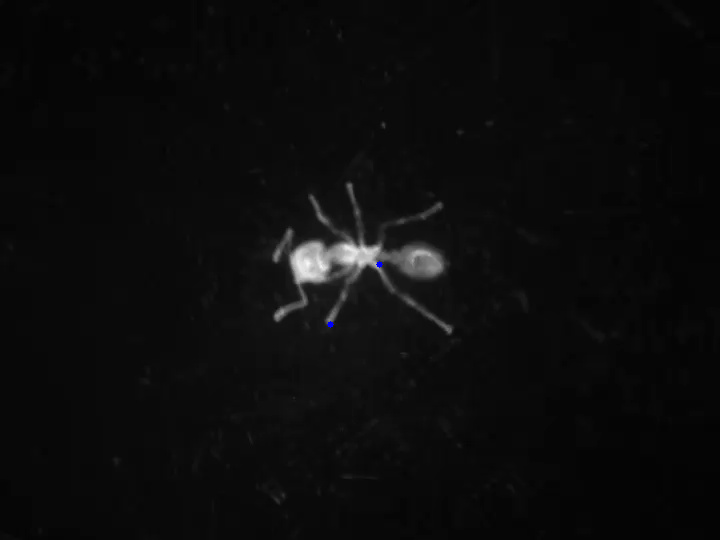

-129.23736711340155
[379, 264]
[330 324]


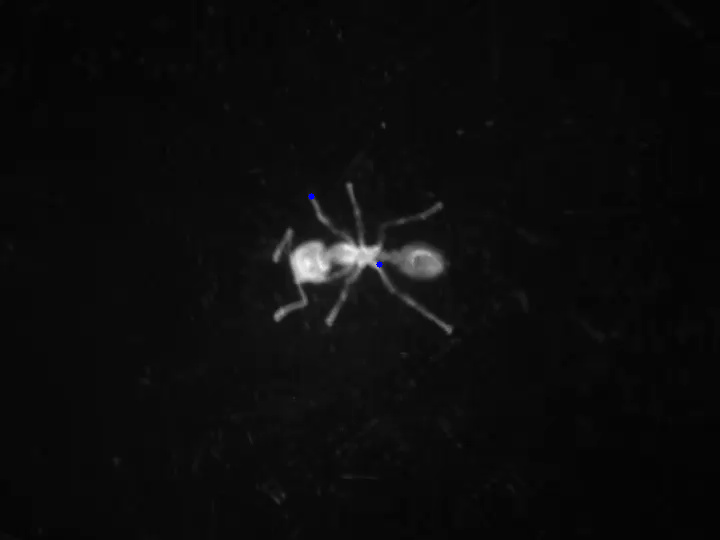

135.0
[379, 264]
[311 196]


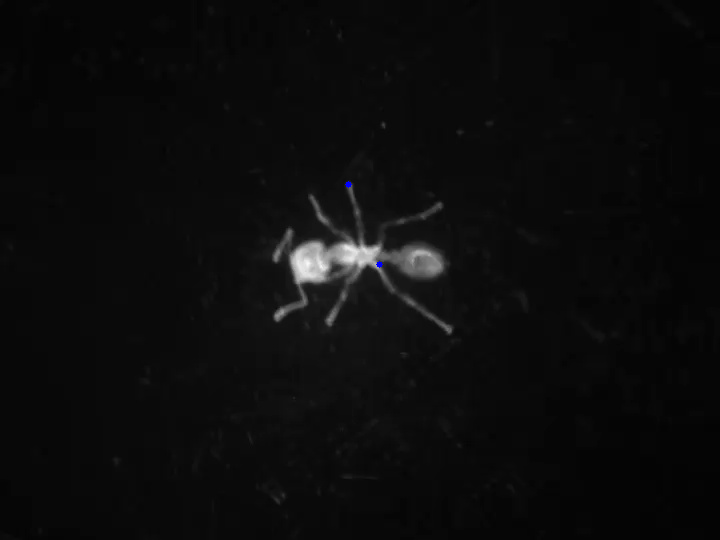

111.18134950026624
[379, 264]
[348 184]


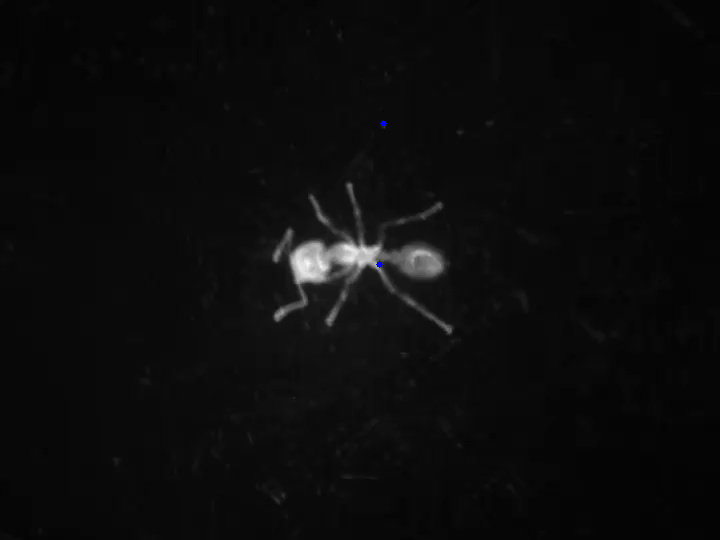

88.37502364247524
[379, 264]
[383 123]


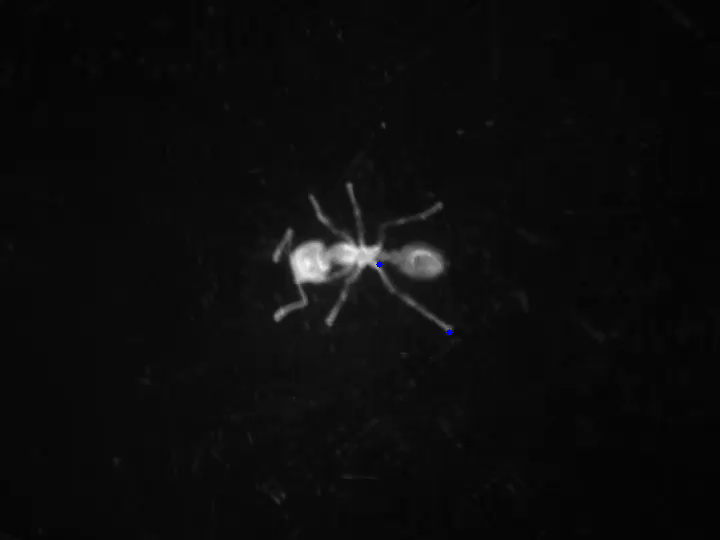

-44.169684513741984
[379, 264]
[449 332]


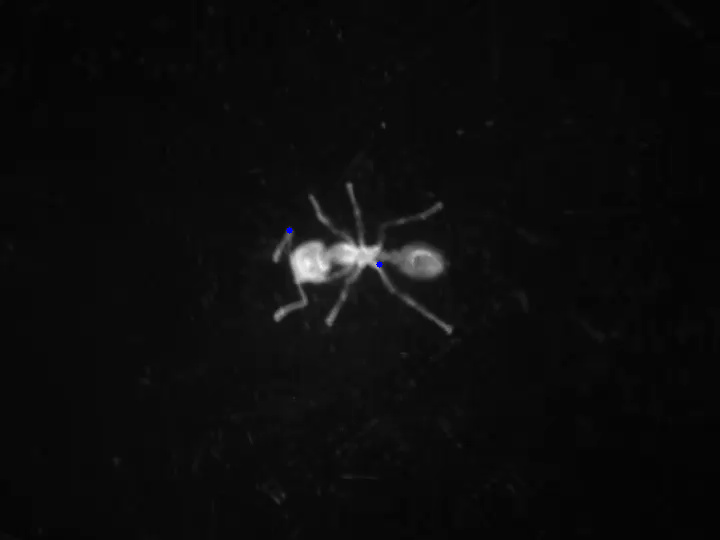

159.3045492659367
[379, 264]
[289 230]


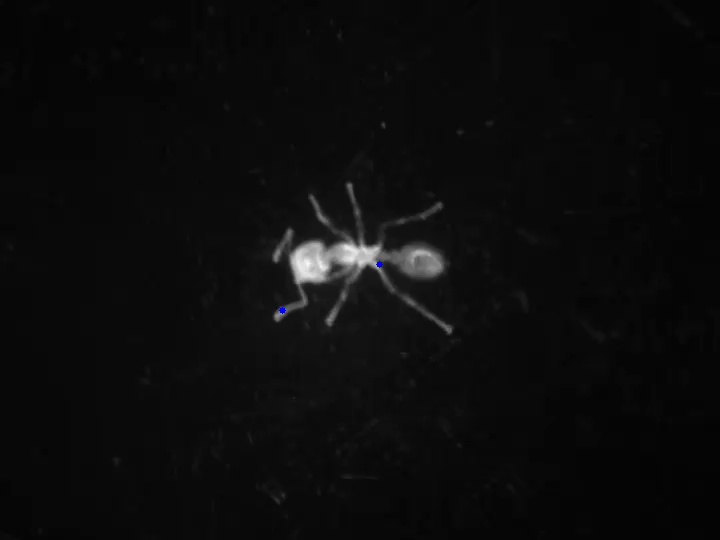

-154.62843824690404
[379, 264]
[282 310]


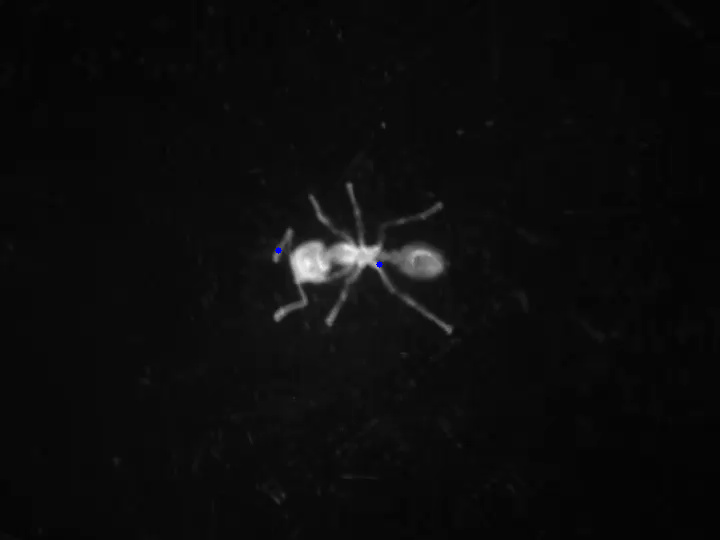

172.1082975717643
[379, 264]
[278 250]


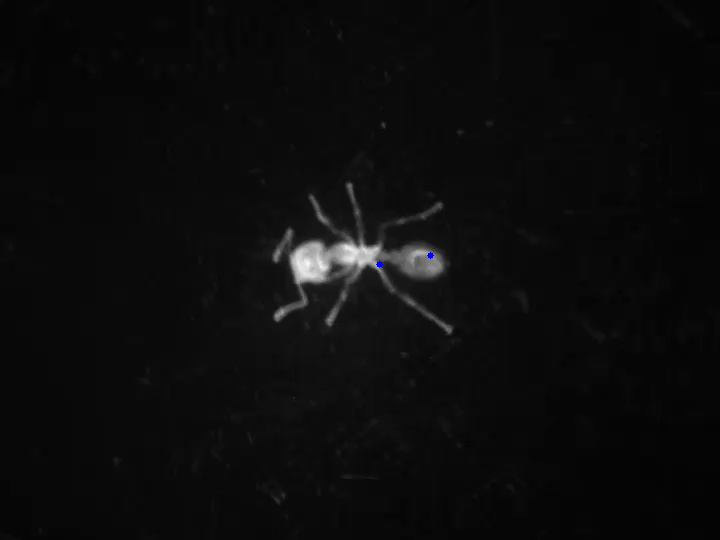

10.00797980144135
[379, 264]
[430 255]


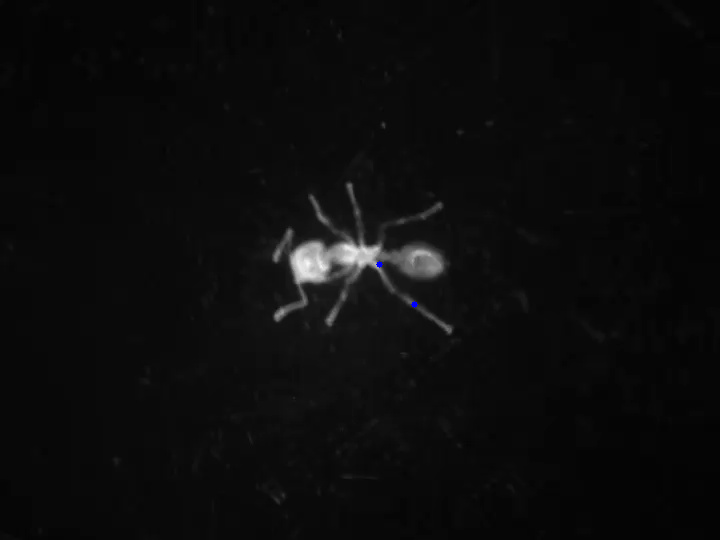

-48.81407483429035
[379, 264]
[414 304]


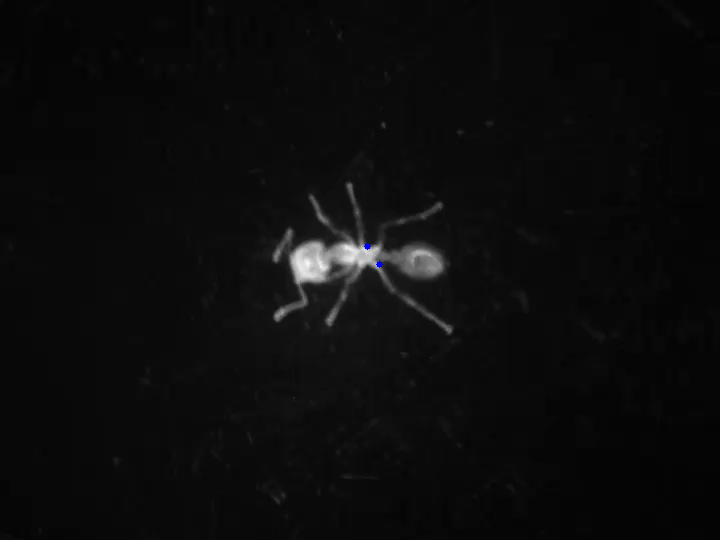

123.69006752597979
[379, 264]
[367 246]


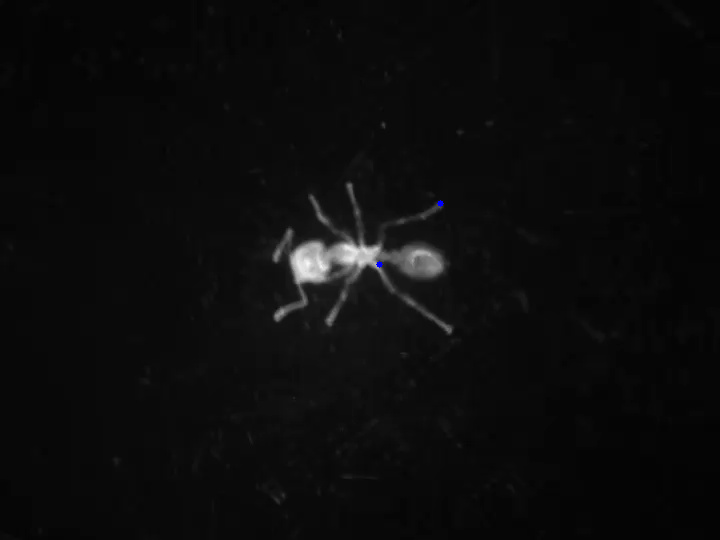

45.0
[379, 264]
[440 203]


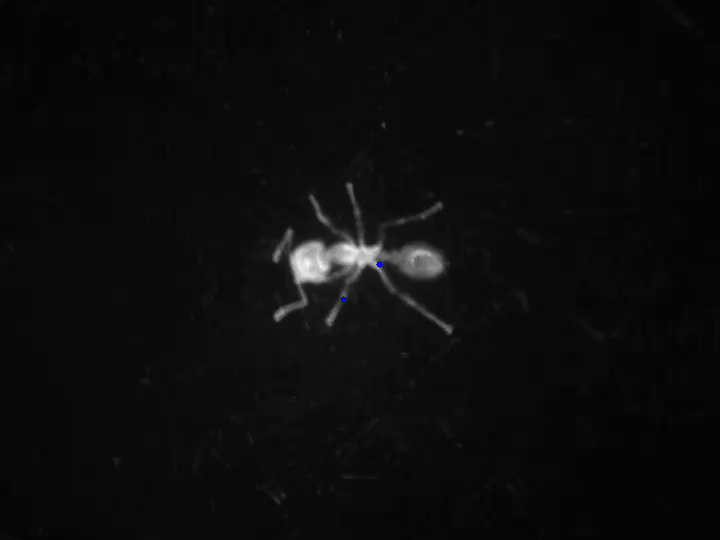

-135.8069294551024
[379, 264]
[343 299]


In [40]:
def leg_angle_update(img_url, num_points):
  img = cv2.imread(img_url)
  blobs = cv2.KeyPoint.convert(blob_detection(img_url))
  a = np.average(blobs, axis = 0)
  mean_point = [int(a[0]), int(a[1])]
  for i in range(num_points):
    point_a = method2(Gaussian, img_url)[i][0]

    img = cv2.imread(img_url)
    cv2.circle(img, point_a, 3, 255, -1)
    cv2.circle(img, mean_point, 3, 255, -1)
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    lineA = ((method2(Gaussian, img_url)[i][0][0], method2(Gaussian, img_url)[i][0][1]), (int(a[0]), int(a[1])))
    lineB = ((int(a[0]), int(a[1])), (int(a[0])-10, int(a[1])))
    angle = ang(lineA, lineB)
    if point_a[1] > mean_point[1]:
       angle = -angle
    # else:
    #   angle = -angle
    
    # if point_a[0] > mean_point[0]:
    #   angle += 180
    print(angle)
    print(mean_point)
    print(point_a)
leg_angle_update('/content/drive/MyDrive/parallel/image' + str(1) + '.jpg', 20)

In [44]:
kmeans.cluster_centers_

array([[434.89967638, 230.50161812],
       [235.00884956, 410.47787611],
       [267.72782875, 294.24159021],
       [274.64492754, 222.45289855],
       [348.7679558 , 330.64917127],
       [365.2       , 173.34594595],
       [366.13091922, 264.26183844],
       [427.91830065, 320.58496732]])

In [52]:
centroids_angle = []
blobs = cv2.KeyPoint.convert(blob_detection('/content/drive/MyDrive/parallel/image' + str(1) + '.jpg'))
a = np.average(blobs, axis = 0)
for i in range(len(clusters)):
  a_point = kmeans.cluster_centers_[i]
  mean_point = (int(a[0]), int(a[1]))
  lineA = (a_point, mean_point)
  lineB = (mean_point, (mean_point[0]-10, mean_point[1]))
  angle = ang(lineA, lineB)
  if a_point[1] > mean_point[1]:
       angle = -angle
  centroids_angle.append(angle)
centroids_angle = [round(i,2) for i in centroids_angle]
centroids_angle

[30.93, -134.51, -164.8, 158.29, -114.4, 98.66, -178.83, -49.16]

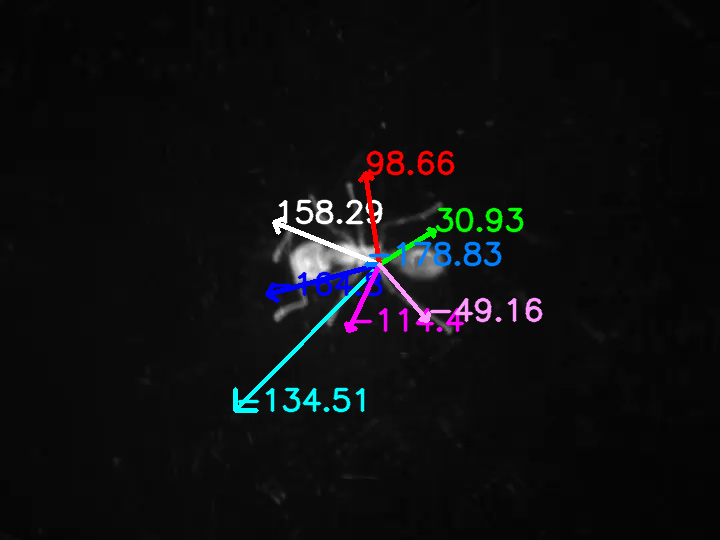

In [53]:
image = cv2.imread('/content/drive/MyDrive/parallel/image' + str(1) + '.jpg')
colors = [(0, 255, 0), (255, 255, 0),(255, 0, 0), (255, 255, 255), (255, 0, 255),(0, 0, 255), (255, 128, 0), (255, 153, 255)]
thickness = 4
for i in range(len(clusters)):
  cv2.arrowedLine(image, mean_point, clusters[i], colors[i], thickness) 
  cv2.putText(image, text = str(centroids_angle[i]), org = clusters[i], fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color= colors[i],
            thickness=2, lineType=cv2.LINE_AA)
cv2_imshow(image) 

# Use KMeans on Angles

In [66]:
angle_100 = []
mean_point_100frame = np.mean(single_res2,axis=0) #the mean points for the first 100 frames, single_res is a list of all points detected from the first 100 frames
lineB_100 = (mean_point_100frame, (mean_point_100frame[0]-10, mean_point_100frame[1]))
for i in range(len(single_res2)):
  point_a_100 = single_res2[i]
  lineA = (point_a_100,mean_point)
  angle = ang(lineA, lineB)
  if point_a_100[1] > mean_point_100frame[1]:
    angle = -angle
  angle_100.append(round(angle,2))
angle_100[:5]

[93.58, 175.24, -165.29, 139.18, 177.78]

In [74]:
# this step is required inorder to fit in the KMeans model
angle_100 = np.array(angle_100).reshape(-1,1)
angle_100

array([[  93.58],
       [ 175.24],
       [-165.29],
       ...,
       [  23.11],
       [ -96.07],
       [ -47.1 ]])

In [75]:
kmeans_angle = KMeans(init="random",n_clusters=6,n_init=10,max_iter=300,random_state=42)
kmeans_angle.fit(angle_100)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [76]:
kmeans_angle.cluster_centers_

array([[ -50.63898462],
       [-109.460925  ],
       [  31.37912913],
       [-152.68002494],
       [ 161.79938398],
       [  98.36298969]])

In [78]:
kmeans_angle.labels_

array([5, 4, 3, ..., 2, 1, 0], dtype=int32)

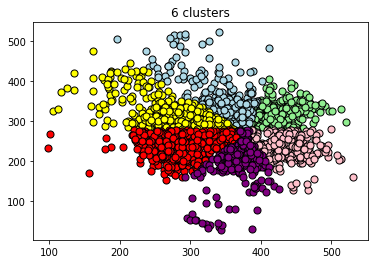

In [79]:
a = list(kmeans_angle.labels_)
colors = ['lightgreen', 'lightblue','pink','yellow','red','purple']
for k in range(0,6):
  res_a = []
  for i in range(len(a)):
    if a[i] == k:
      res_a.append(i)
  cluster1 = [single_res2[i] for i in res_a]
  cluster1_x = [cluster1[j][0] for j in range(len(cluster1))]
  cluster1_y = [cluster1[j][1] for j in range(len(cluster1))]
  plt.scatter(
      cluster1_x, cluster1_y,
      s=50, c=colors[k],
      marker='o', edgecolor='black',
      label='cluster 2'
  )
  plt.title("6 clusters")